In [1]:
from plot import DataVisualizer

In [2]:
dv = DataVisualizer(["TransMLP/diagnose_depthoptima_fashionmnist"])
# dv.visualize_data("depth")

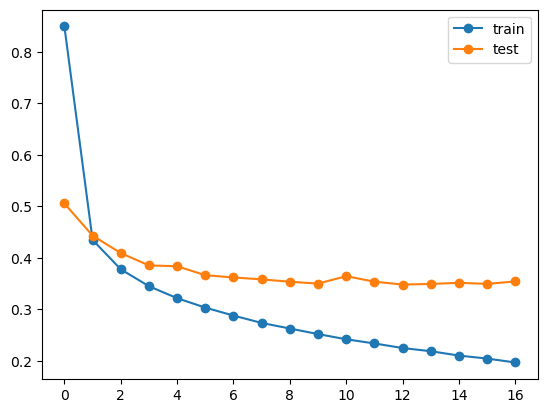

Train-test loss difference:  -0.15143723785877228
Best train loss:  0.19682784378528595
Best test loss:  0.3482650816440582


In [5]:
dv.visualize_capacity({"batch size": 32, "dropout": 0.02, "lr": 8e-5, "depth": 10, "width": 64})

In [ ]:
## Width 32
# Depth 2: 0.12321794033050537 test-train best loss difference, 1.387790560722351 best train loss, 1.5110085010528564 best test loss
# Depth 3: 0.18934881687164307 test-train best loss difference, 1.3059146404266357 best train loss, 1.4952634572982788 best test loss
# Depth 4: 0.12778615951538086 test-train best loss difference, 1.3651734590530396 best train loss, 1.4929596185684204 best test loss
# Depth 5: 0.1676030158996582 test-train best loss difference, 1.3454830646514893 best train loss, 1.5130860805511475 best test loss
# Depth 10: 0.14784836769104004 test-train best loss difference, 1.3416292667388916 best train loss, 1.4894776344299316 best test loss

## Width 64
# Depth 2: 0.26845550537109375 test-train best loss difference, 1.1316114664077759 best train loss, 1.4000669717788696 best test loss
# Depth 3: 0.35421204566955566 test-train best loss difference, 1.0592035055160522 best train loss, 1.413415551185608 best test loss
# Depth 4: 0.3444911241531372 test-train best loss difference, 1.0956332683563232 best train loss, 1.4401243925094604 best test loss
# Depth 5: 0.3764376640319824 test-train best loss difference, 1.060744285583496 best train loss, 1.4371819496154785 best test loss
# Depth 10: 0.3684195280075073 test-train best loss difference, 1.1179676055908203 best train loss, 1.4863871335983276 best test loss

### Depth 10
Train-test loss difference:  -0.15143723785877228
Best train loss:  0.19682784378528595
Best test loss:  0.3482650816440582


### Depth 2
Train-test loss difference:  -0.13946229219436646
Best train loss:  0.18786782026290894
Best test loss:  0.3273301124572754

## Depth 3
Train-test loss difference:  -0.11925707757472992
Best train loss:  0.21980325877666473
Best test loss:  0.33906033635139465